# Capstone Project

***

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero
from numpy import median
from numpy import mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta


import scipy.stats

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Week 1: Getting to Know the Data

## Exploratory Data Analysis

In [2]:
df = pd.read_csv("ad.csv", parse_dates=["Date"])

In [3]:
df

,Date,FacebookAdCampaign,FacebookAdViews,FacebookAdClicks,FacebookAdConversions,CostperFacebookAd,FacebookClickThroughRate,FacebookConversionRate,FacebookCostperClick,AdwareAdCampaign,AdwareAdViews,AdwareAdClicks,AdwareAdConversions,CostperAdwareAd,AdwareClickThroughRate,AdwareConversionRate,AdwareCostperClick
0,2019-01-01,FB_Jan19,2116,18,8,126,0.01,0.43,7.14,AW_Jan19,4984,59,5,194,0.01,0.08,3.30
1,2019-01-02,FB_Jan19,3106,36,12,104,0.01,0.34,2.91,AW_Jan19,4022,71,6,75,0.02,0.08,1.05
2,2019-01-03,FB_Jan19,3105,26,8,102,0.01,0.31,3.89,AW_Jan19,3863,44,4,141,0.01,0.10,3.23
3,2019-01-04,FB_Jan19,1107,27,9,71,0.02,0.35,2.62,AW_Jan19,3911,49,5,141,0.01,0.11,2.86
4,2019-01-05,FB_Jan19,1317,15,7,78,0.01,0.48,5.38,AW_Jan19,4070,55,7,133,0.01,0.12,2.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,FB_Dec19,3240,51,13,63,0.02,0.26,1.24,AW_Dec19,5332,72,9,76,0.01,0.12,1.06
361,2019-12-28,FB_Dec19,1510,69,18,97,0.05,0.26,1.42,AW_Dec19,3887,49,6,121,0.01,0.13,2.46
362,2019-12-29,FB_Dec19,2918,44,13,49,0.01,0.29,1.11,AW_Dec19,5327,62,6,128,0.01,0.10,2.08
363,2019-12-30,FB_Dec19,2212,37,8,102,0.02,0.23,2.75,AW_Dec19,4020,71,6,119,0.02,0.08,1.68


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      365 non-null    datetime64[ns]
 1   FacebookAdCampaign        365 non-null    object        
 2   FacebookAdViews           365 non-null    int64         
 3   FacebookAdClicks          365 non-null    int64         
 4   FacebookAdConversions     365 non-null    int64         
 5   CostperFacebookAd         365 non-null    int64         
 6   FacebookClickThroughRate  365 non-null    float64       
 7   FacebookConversionRate    365 non-null    float64       
 8   FacebookCostperClick      365 non-null    float64       
 9   AdwareAdCampaign          365 non-null    object        
 10  AdwareAdViews             365 non-null    int64         
 11  AdwareAdClicks            365 non-null    int64         
 12  AdwareAdConversions   

In [5]:
df.describe()

,FacebookAdViews,FacebookAdClicks,FacebookAdConversions,CostperFacebookAd,FacebookClickThroughRate,FacebookConversionRate,FacebookCostperClick,AdwareAdViews,AdwareAdClicks,AdwareAdConversions,CostperAdwareAd,AdwareClickThroughRate,AdwareConversionRate,AdwareCostperClick
count,365.00,365.00,365.00,365.00,365.00,365.00,365.00,365.00,365.00,365.00,365.00,365.00,365.00,365.00
mean,2179.69,44.05,11.74,87.78,0.02,0.27,2.19,4717.20,60.38,5.98,134.98,0.01,0.10,2.38
std,618.07,12.14,2.92,28.26,0.01,0.04,1.04,561.11,14.37,1.63,32.34,0.00,0.03,0.86
min,1050.00,15.00,5.00,34.00,0.01,0.21,0.61,3714.00,31.00,3.00,73.00,0.01,0.06,0.85
25%,1656.00,35.00,10.00,63.00,0.01,0.24,1.41,4247.00,49.00,5.00,110.00,0.01,0.08,1.76
50%,2202.00,43.00,12.00,88.00,0.02,0.27,2.02,4711.00,60.00,6.00,135.00,0.01,0.10,2.29
75%,2717.00,54.00,13.00,111.00,0.03,0.29,2.76,5190.00,73.00,7.00,162.00,0.02,0.12,2.81
max,3320.00,73.00,19.00,144.00,0.05,0.48,7.14,5760.00,89.00,9.00,197.00,0.02,0.20,5.65


In [6]:
df.columns

Index(['Date', 'FacebookAdCampaign', 'FacebookAdViews', 'FacebookAdClicks', 'FacebookAdConversions', 'CostperFacebookAd', 'FacebookClickThroughRate', 'FacebookConversionRate', 'FacebookCostperClick', 'AdwareAdCampaign', 'AdwareAdViews', 'AdwareAdClicks', 'AdwareAdConversions', 'CostperAdwareAd', 'AdwareClickThroughRate', 'AdwareConversionRate', 'AdwareCostperClick'], dtype='object')

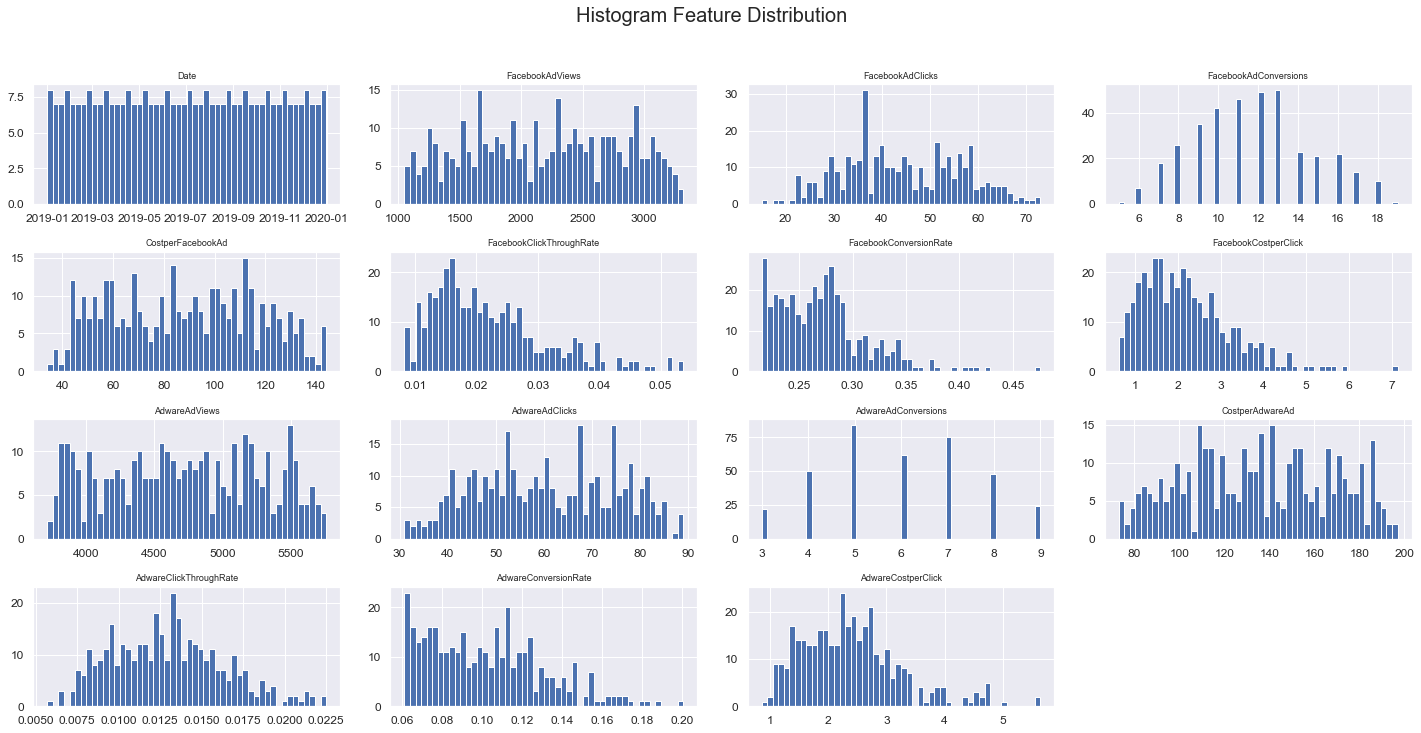

In [7]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

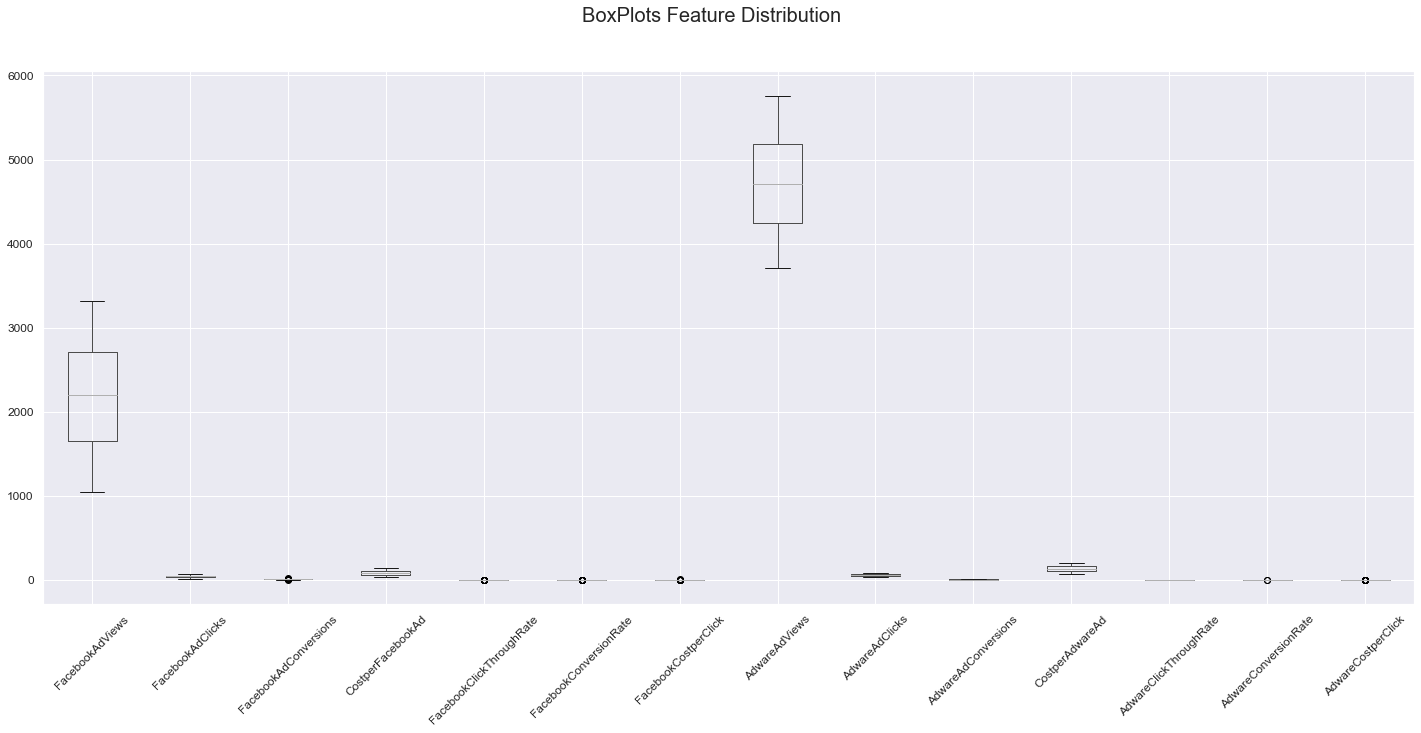

In [8]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
df.corr()

,FacebookAdViews,FacebookAdClicks,FacebookAdConversions,CostperFacebookAd,FacebookClickThroughRate,FacebookConversionRate,FacebookCostperClick,AdwareAdViews,AdwareAdClicks,AdwareAdConversions,CostperAdwareAd,AdwareClickThroughRate,AdwareConversionRate,AdwareCostperClick
FacebookAdViews,1.00,0.07,0.07,-0.10,-0.69,-0.03,-0.13,0.04,0.03,-0.03,0.08,0.01,-0.06,0.02
FacebookAdClicks,0.07,1.00,0.87,-0.05,0.61,-0.44,-0.68,-0.02,-0.01,0.02,-0.06,-0.00,0.04,-0.02
FacebookAdConversions,0.07,0.87,1.00,-0.13,0.53,0.01,-0.62,-0.03,-0.04,0.02,-0.07,-0.02,0.08,-0.01
CostperFacebookAd,-0.10,-0.05,-0.13,1.00,0.03,-0.07,0.70,-0.04,0.02,0.02,-0.06,0.05,0.01,-0.07
FacebookClickThroughRate,-0.69,0.61,0.53,0.03,1.00,-0.29,-0.37,-0.04,-0.03,0.03,-0.08,-0.02,0.08,-0.02
FacebookConversionRate,-0.03,-0.44,0.01,-0.07,-0.29,1.00,0.34,-0.04,-0.07,-0.02,0.01,-0.04,0.06,0.05
FacebookCostperClick,-0.13,-0.68,-0.62,0.70,-0.37,0.34,1.00,-0.01,-0.01,-0.01,0.01,0.00,-0.01,0.00
AdwareAdViews,0.04,-0.02,-0.03,-0.04,-0.04,-0.04,-0.01,1.00,0.08,-0.01,0.06,-0.39,-0.09,-0.03
AdwareAdClicks,0.03,-0.01,-0.04,0.02,-0.03,-0.07,-0.01,0.08,1.00,0.45,-0.01,0.88,-0.43,-0.71
AdwareAdConversions,-0.03,0.02,0.02,0.02,0.03,-0.02,-0.01,-0.01,0.45,1.00,-0.10,0.41,0.57,-0.39


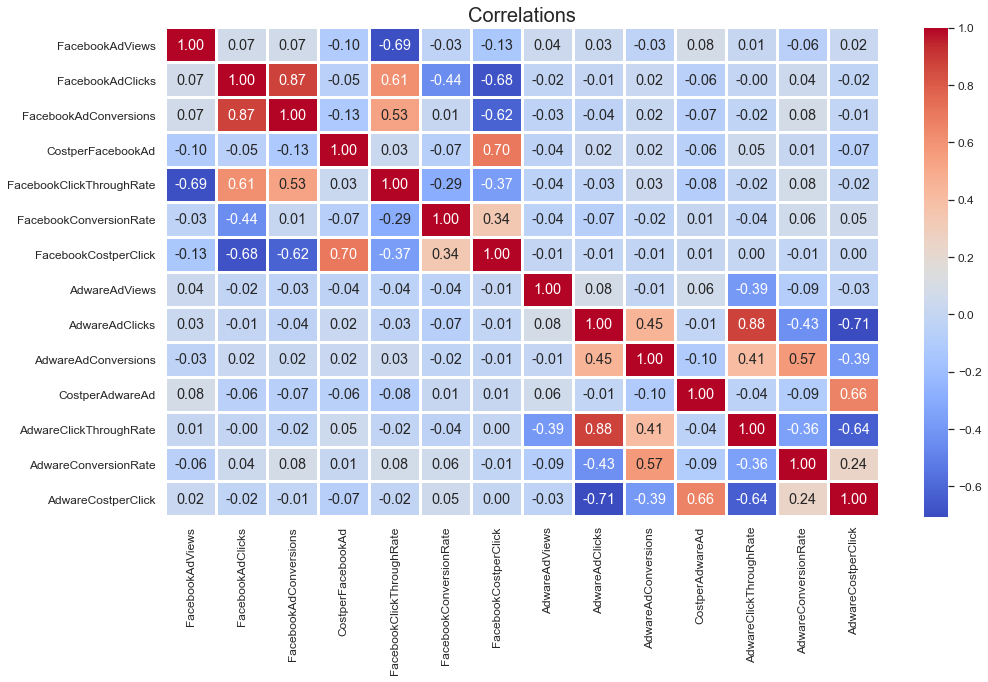

In [10]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("Correlations", fontsize=20)
plt.show()

### 1. Calculate Measures of Central Tendency

Note: for your Capstone Week 1 assignment, you are doing these calculations for “AdWords Ad Clicks” and “AdWords Ad Conversions.”

In [11]:
df['AdwareAdClicks'].describe(include='all')

count   365.00
mean     60.38
std      14.37
min      31.00
25%      49.00
50%      60.00
75%      73.00
max      89.00
Name: AdwareAdClicks, dtype: float64

In [12]:
df['AdwareAdClicks'].mode()

0    78
dtype: int64

In [13]:
df['AdwareAdConversions'].describe()

count   365.00
mean      5.98
std       1.63
min       3.00
25%       5.00
50%       6.00
75%       7.00
max       9.00
Name: AdwareAdConversions, dtype: float64

In [14]:
df['AdwareAdConversions'].mode()

0    5
dtype: int64

### 2. Calculate the Standard Deviations

### 3. Create a Frequency Table for Conversions; Analyze the Correlation between Clicks and Conversions

In [15]:
df.columns

Index(['Date', 'FacebookAdCampaign', 'FacebookAdViews', 'FacebookAdClicks', 'FacebookAdConversions', 'CostperFacebookAd', 'FacebookClickThroughRate', 'FacebookConversionRate', 'FacebookCostperClick', 'AdwareAdCampaign', 'AdwareAdViews', 'AdwareAdClicks', 'AdwareAdConversions', 'CostperAdwareAd', 'AdwareClickThroughRate', 'AdwareConversionRate', 'AdwareCostperClick'], dtype='object')

In [16]:
df["AdwareAdConversions"].value_counts(sort=False)

3    22
4    50
5    84
6    62
7    75
8    48
9    24
Name: AdwareAdConversions, dtype: int64

In [17]:
my_tab = pd.crosstab(index=df["AdwareAdConversions"], columns=["Count"])

In [18]:
my_tab

col_0,Count
AdwareAdConversions,
3,22
4,50
5,84
6,62
7,75
8,48
9,24


In [19]:
my_tab.reset_index(inplace=True)

In [20]:
my_tab

col_0,AdwareAdConversions,Count
0,3,22
1,4,50
2,5,84
3,6,62
4,7,75
5,8,48
6,9,24


In [21]:
# create a list of our conditions
conditions = [
    (df['AdwareAdConversions'] < 6),
    (df['AdwareAdConversions'] >= 6) & (df['AdwareAdConversions'] <= 10),
    (df['AdwareAdConversions'] > 10) & (df['AdwareAdConversions'] <= 15),
    (df['AdwareAdConversions'] > 15)
    ]

In [22]:
values = ['1 to 5', '6 to 10', '11 to 15', '16+']

In [23]:
# create a new column and use np.select to assign values to it using our lists as arguments
df['Number of Occurances'] = np.select(conditions, values)

In [24]:
df.head()

,Date,FacebookAdCampaign,FacebookAdViews,FacebookAdClicks,FacebookAdConversions,CostperFacebookAd,FacebookClickThroughRate,FacebookConversionRate,FacebookCostperClick,AdwareAdCampaign,AdwareAdViews,AdwareAdClicks,AdwareAdConversions,CostperAdwareAd,AdwareClickThroughRate,AdwareConversionRate,AdwareCostperClick,Number of Occurances
0,2019-01-01,FB_Jan19,2116,18,8,126,0.01,0.43,7.14,AW_Jan19,4984,59,5,194,0.01,0.08,3.30,1 to 5
1,2019-01-02,FB_Jan19,3106,36,12,104,0.01,0.34,2.91,AW_Jan19,4022,71,6,75,0.02,0.08,1.05,6 to 10
2,2019-01-03,FB_Jan19,3105,26,8,102,0.01,0.31,3.89,AW_Jan19,3863,44,4,141,0.01,0.10,3.23,1 to 5
3,2019-01-04,FB_Jan19,1107,27,9,71,0.02,0.35,2.62,AW_Jan19,3911,49,5,141,0.01,0.11,2.86,1 to 5
4,2019-01-05,FB_Jan19,1317,15,7,78,0.01,0.48,5.38,AW_Jan19,4070,55,7,133,0.01,0.12,2.40,6 to 10


In [25]:
df.groupby(["Number of Occurances"])["AdwareAdConversions"].sum()

Number of Occurances
1 to 5      686
6 to 10    1497
Name: AdwareAdConversions, dtype: int64

In [26]:
pd.DataFrame(df.groupby(["Number of Occurances"])["AdwareAdConversions"].sum())

,AdwareAdConversions
Number of Occurances,
1 to 5,686
6 to 10,1497


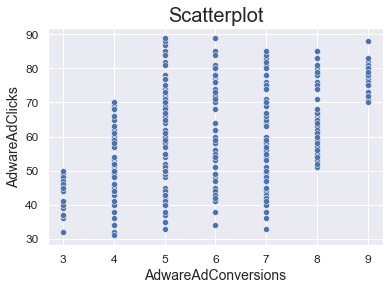

In [27]:
sns.scatterplot(y=df.AdwareAdClicks, x=df.AdwareAdConversions, data=df)
plt.title("Scatterplot", size=20)
plt.show()

### Correlation

In [28]:
df[["AdwareAdConversions","AdwareAdClicks"]].corr()

,AdwareAdConversions,AdwareAdClicks
AdwareAdConversions,1.00,0.45
AdwareAdClicks,0.45,1.00


## Capstone Week 2: Understanding Your Data Samples

### 1. Create Histograms for ‘Clicks’ and ‘Conversions’ Data

For your Capstone Week 2 assignment create histograms for AdWords Ad Clicks and AdWords Ad Conversions, then determine whether they fall under a normal distribution curve

In [29]:
df.columns

Index(['Date', 'FacebookAdCampaign', 'FacebookAdViews', 'FacebookAdClicks', 'FacebookAdConversions', 'CostperFacebookAd', 'FacebookClickThroughRate', 'FacebookConversionRate', 'FacebookCostperClick', 'AdwareAdCampaign', 'AdwareAdViews', 'AdwareAdClicks', 'AdwareAdConversions', 'CostperAdwareAd', 'AdwareClickThroughRate', 'AdwareConversionRate', 'AdwareCostperClick', 'Number of Occurances'], dtype='object')

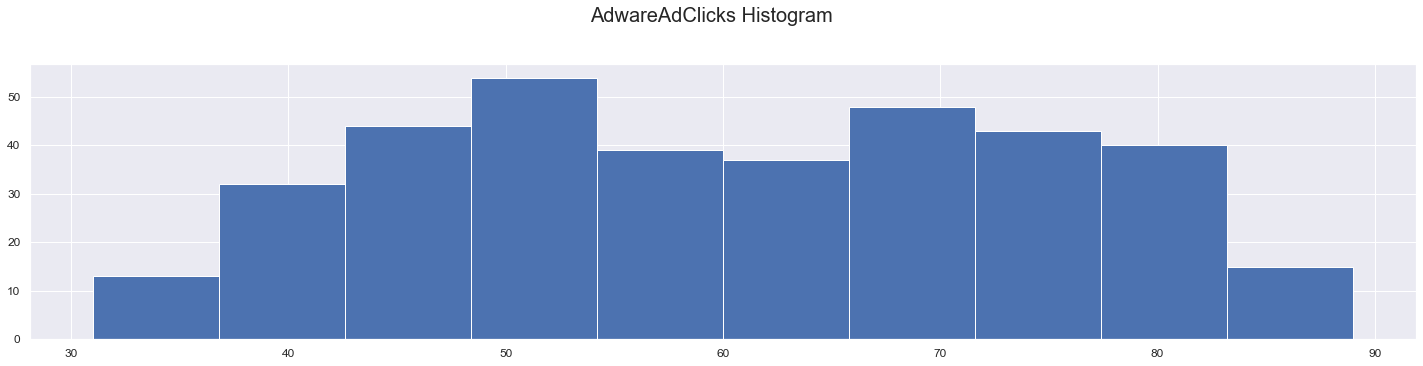

In [30]:
df['AdwareAdClicks'].hist(bins=10, figsize=(20,5))
plt.suptitle('AdwareAdClicks Histogram', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

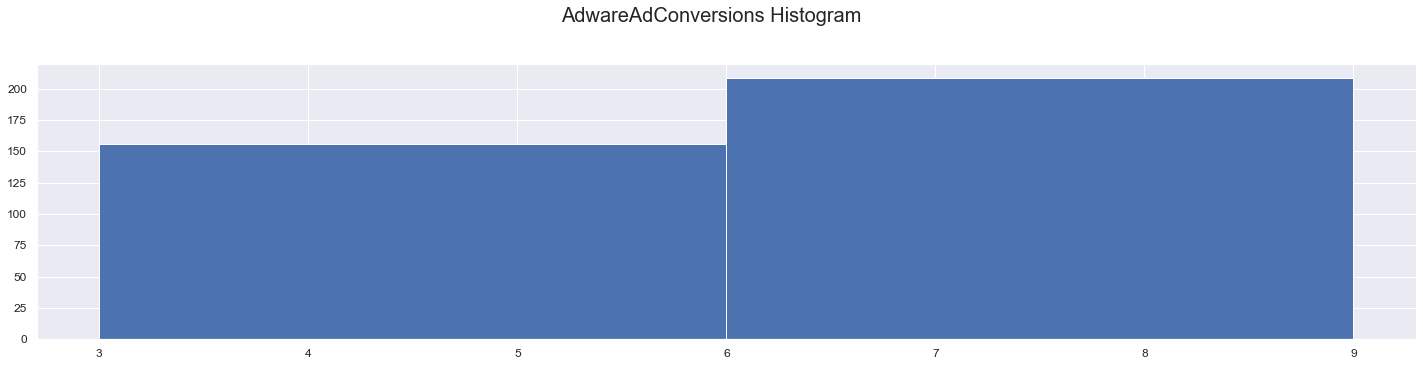

In [31]:
df['AdwareAdConversions'].hist(bins=2, figsize=(20,5))
plt.suptitle('AdwareAdConversions Histogram', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

### 2. Determine What Variable Types You’re Working With

| Variable          | Variable types                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| AdWords Ad Views | Quantitative-Continuous	|
| AdWords Ad Clicks |	Quantitative-Continuous |
| Cost per AdWords Ad |	Quantitative-Continuous |
| AdWords Click-Through Rate |	Quantitative-Continuous |
| AdWords Conversion Rate |	Quantitative-Continuous |
| AdWords Cost per Click |	Quantitative-Continuous |

## Capstone Week 3: Testing Your Hypothesis

The first task we want you to address this week is to write a hypothesis statement that answers this evaluation question.

In [32]:
df.head()

,Date,FacebookAdCampaign,FacebookAdViews,FacebookAdClicks,FacebookAdConversions,CostperFacebookAd,FacebookClickThroughRate,FacebookConversionRate,FacebookCostperClick,AdwareAdCampaign,AdwareAdViews,AdwareAdClicks,AdwareAdConversions,CostperAdwareAd,AdwareClickThroughRate,AdwareConversionRate,AdwareCostperClick,Number of Occurances
0,2019-01-01,FB_Jan19,2116,18,8,126,0.01,0.43,7.14,AW_Jan19,4984,59,5,194,0.01,0.08,3.30,1 to 5
1,2019-01-02,FB_Jan19,3106,36,12,104,0.01,0.34,2.91,AW_Jan19,4022,71,6,75,0.02,0.08,1.05,6 to 10
2,2019-01-03,FB_Jan19,3105,26,8,102,0.01,0.31,3.89,AW_Jan19,3863,44,4,141,0.01,0.10,3.23,1 to 5
3,2019-01-04,FB_Jan19,1107,27,9,71,0.02,0.35,2.62,AW_Jan19,3911,49,5,141,0.01,0.11,2.86,1 to 5
4,2019-01-05,FB_Jan19,1317,15,7,78,0.01,0.48,5.38,AW_Jan19,4070,55,7,133,0.01,0.12,2.40,6 to 10


**H0 = Are the number of conversions in Facebook greater than AdWareAd when more advertising is done there?**

### 2. Determine Your Independent and Dependent Variables

Dependent Variables: Facebook Ad Conversions

Independant Variables: Cost per Facebook Ad

a​. Calculate the mean values for the “Facebook Ad Conversions” and “AdWords Ad Conversions” data you were given in your Capstone Dataset

In [33]:
df["FacebookAdConversions"].mean()

11.742465753424657

In [34]:
df["AdwareAdConversions"].mean()

5.980821917808219

b. Next, you need to determine whether this overall difference is a statistically significant difference. You learned to do this by comparing the p-value for your data to some given Alpha value (𝛂).

## T-Test

### Two Samples T-Test

In [35]:
t, p = scipy.stats.ttest_ind(a=df.FacebookAdConversions,b=df.AdwareAdConversions, equal_var = False)

In [36]:
print("T-test value is: ",t)
print("p-value value is: ",p)

T-test value is:  32.88402060758184
p-value value is:  9.348918164530467e-134


c. Given what you’ve discovered about whether there’s a statistically significant difference in the data, what does this tell you about whether to accept the null hypothesis or the alternative hypothesis?

**Since the p-value calculated is less than 0.05, H0 is rejected, and H1 is accepted**

d. Finally, putting it all together: What’s your conclusion about your main hypothesis? Is there a difference, and is it what your hypothesis predicted?

**There is a statistical difference between Facebook and AdAware Ad Conversions.**

## Capstone Week 4: Show Me the Model

### 1. Choosing a Model

In [37]:
df.head()

,Date,FacebookAdCampaign,FacebookAdViews,FacebookAdClicks,FacebookAdConversions,CostperFacebookAd,FacebookClickThroughRate,FacebookConversionRate,FacebookCostperClick,AdwareAdCampaign,AdwareAdViews,AdwareAdClicks,AdwareAdConversions,CostperAdwareAd,AdwareClickThroughRate,AdwareConversionRate,AdwareCostperClick,Number of Occurances
0,2019-01-01,FB_Jan19,2116,18,8,126,0.01,0.43,7.14,AW_Jan19,4984,59,5,194,0.01,0.08,3.30,1 to 5
1,2019-01-02,FB_Jan19,3106,36,12,104,0.01,0.34,2.91,AW_Jan19,4022,71,6,75,0.02,0.08,1.05,6 to 10
2,2019-01-03,FB_Jan19,3105,26,8,102,0.01,0.31,3.89,AW_Jan19,3863,44,4,141,0.01,0.10,3.23,1 to 5
3,2019-01-04,FB_Jan19,1107,27,9,71,0.02,0.35,2.62,AW_Jan19,3911,49,5,141,0.01,0.11,2.86,1 to 5
4,2019-01-05,FB_Jan19,1317,15,7,78,0.01,0.48,5.38,AW_Jan19,4070,55,7,133,0.01,0.12,2.40,6 to 10


**Simple Linear Regression is chosen due to one independant and one dependant variable**

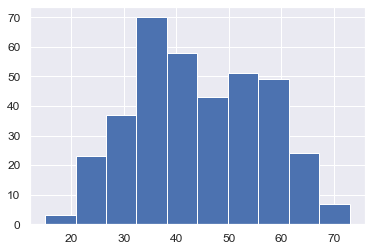

In [38]:
df["FacebookAdClicks"].hist()
plt.show()

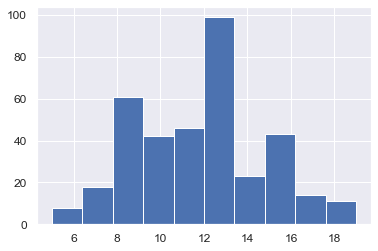

In [39]:
df["FacebookAdConversions"].hist()
plt.show()

## Data Preprocessing

### Treat Missing Values

In [40]:
df.isnull().sum()

Date                        0
FacebookAdCampaign          0
FacebookAdViews             0
FacebookAdClicks            0
FacebookAdConversions       0
CostperFacebookAd           0
FacebookClickThroughRate    0
FacebookConversionRate      0
FacebookCostperClick        0
AdwareAdCampaign            0
AdwareAdViews               0
AdwareAdClicks              0
AdwareAdConversions         0
CostperAdwareAd             0
AdwareClickThroughRate      0
AdwareConversionRate        0
AdwareCostperClick          0
Number of Occurances        0
dtype: int64

## Regression Analysis

### Linear Regression

In [41]:
df.columns

Index(['Date', 'FacebookAdCampaign', 'FacebookAdViews', 'FacebookAdClicks', 'FacebookAdConversions', 'CostperFacebookAd', 'FacebookClickThroughRate', 'FacebookConversionRate', 'FacebookCostperClick', 'AdwareAdCampaign', 'AdwareAdViews', 'AdwareAdClicks', 'AdwareAdConversions', 'CostperAdwareAd', 'AdwareClickThroughRate', 'AdwareConversionRate', 'AdwareCostperClick', 'Number of Occurances'], dtype='object')

In [42]:
y = df['FacebookAdConversions']
X = df['FacebookAdClicks']

In [43]:
X = sm.add_constant(X)

In [44]:
model = sm.OLS(y,X).fit()

In [45]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     FacebookAdConversions   R-squared:                       0.763
Model:                               OLS   Adj. R-squared:                  0.763
Method:                    Least Squares   F-statistic:                     1172.
Date:                   Fri, 19 Nov 2021   Prob (F-statistic):          1.09e-115
Time:                           10:57:39   Log-Likelihood:                -646.02
No. Observations:                    365   AIC:                             1296.
Df Residuals:                        363   BIC:                             1304.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.4700      0.281      8.792      0.000       1.918       3.023
FacebookAdClicks     0.2105      0.006     34.231      0.000       0.198       0.223
==============================================================================
Omnibus:                      156.204   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.421
Skew:                           0.063   Prob(JB):                     3.68e-05
Kurtosis:                       1.848   Cond. No.                         172.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
prediction = model.predict(X)

In [47]:
prediction

0      6.26
1     10.05
2      7.94
3      8.15
4      5.63
       ... 
360   13.21
361   16.99
362   11.73
363   10.26
364   15.10
Length: 365, dtype: float64

### Residual Plots

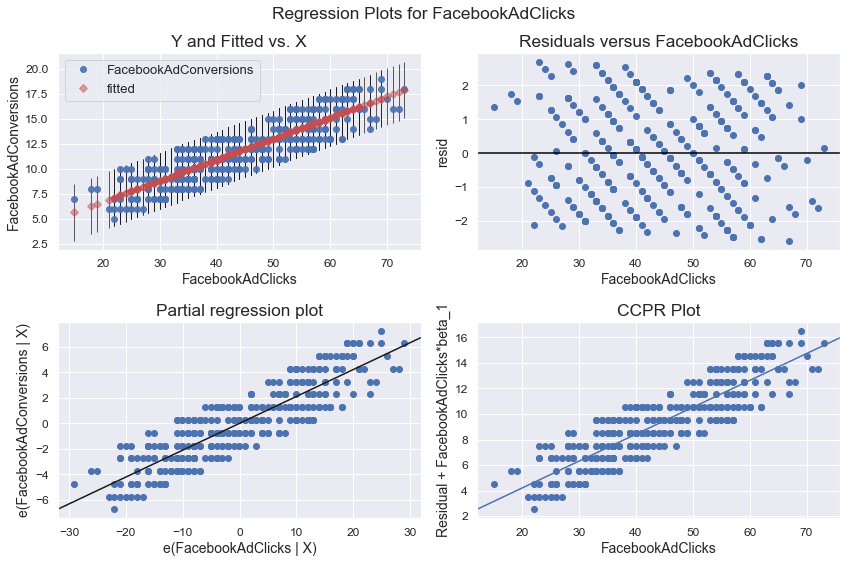

In [48]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'FacebookAdClicks', fig=fig)

## Simple Linear Regression

In [49]:
df

,Date,FacebookAdCampaign,FacebookAdViews,FacebookAdClicks,FacebookAdConversions,CostperFacebookAd,FacebookClickThroughRate,FacebookConversionRate,FacebookCostperClick,AdwareAdCampaign,AdwareAdViews,AdwareAdClicks,AdwareAdConversions,CostperAdwareAd,AdwareClickThroughRate,AdwareConversionRate,AdwareCostperClick,Number of Occurances
0,2019-01-01,FB_Jan19,2116,18,8,126,0.01,0.43,7.14,AW_Jan19,4984,59,5,194,0.01,0.08,3.30,1 to 5
1,2019-01-02,FB_Jan19,3106,36,12,104,0.01,0.34,2.91,AW_Jan19,4022,71,6,75,0.02,0.08,1.05,6 to 10
2,2019-01-03,FB_Jan19,3105,26,8,102,0.01,0.31,3.89,AW_Jan19,3863,44,4,141,0.01,0.10,3.23,1 to 5
3,2019-01-04,FB_Jan19,1107,27,9,71,0.02,0.35,2.62,AW_Jan19,3911,49,5,141,0.01,0.11,2.86,1 to 5
4,2019-01-05,FB_Jan19,1317,15,7,78,0.01,0.48,5.38,AW_Jan19,4070,55,7,133,0.01,0.12,2.40,6 to 10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,FB_Dec19,3240,51,13,63,0.02,0.26,1.24,AW_Dec19,5332,72,9,76,0.01,0.12,1.06,6 to 10
361,2019-12-28,FB_Dec19,1510,69,18,97,0.05,0.26,1.42,AW_Dec19,3887,49,6,121,0.01,0.13,2.46,6 to 10
362,2019-12-29,FB_Dec19,2918,44,13,49,0.01,0.29,1.11,AW_Dec19,5327,62,6,128,0.01,0.10,2.08,6 to 10
363,2019-12-30,FB_Dec19,2212,37,8,102,0.02,0.23,2.75,AW_Dec19,4020,71,6,119,0.02,0.08,1.68,6 to 10


In [50]:
y = df[['FacebookAdConversions']]
X = df[['FacebookAdClicks']]

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=0)

In [52]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((292, 1), (73, 1), (292, 1), (73, 1))

In [53]:
lrmodel = LinearRegression()

In [54]:
lrmodel.fit(X_train,y_train)

LinearRegression()

In [55]:
y_pred = lrmodel.predict(X_test)

In [56]:
y_pred[:5]

array([[14.57927624],
       [14.17301443],
       [11.32918178],
       [11.93857449],
       [10.31352726]])

In [57]:
mse = mean_squared_error(y_test,y_pred)
mse

2.154474491489892

In [58]:
rmse = np.sqrt(mse)
rmse

1.4678128257682899

In [59]:
r2score = r2_score(y_test,y_pred)
r2score

0.7827917332258194

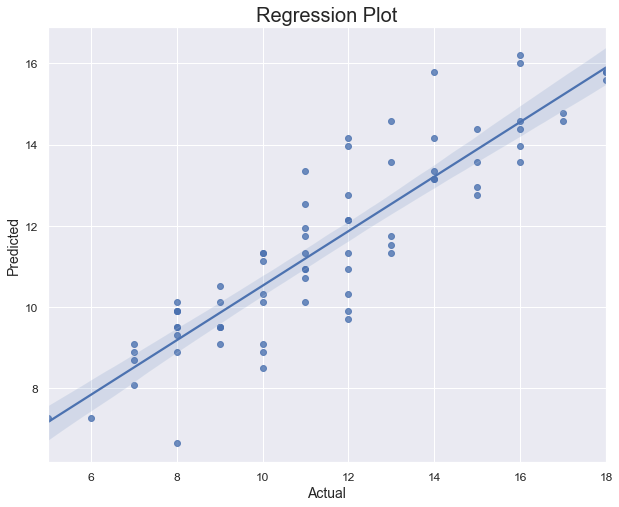

In [60]:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(x=y_test, y=y_pred, ax=ax)
plt.title("Regression Plot", fontsize=20)
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.show()

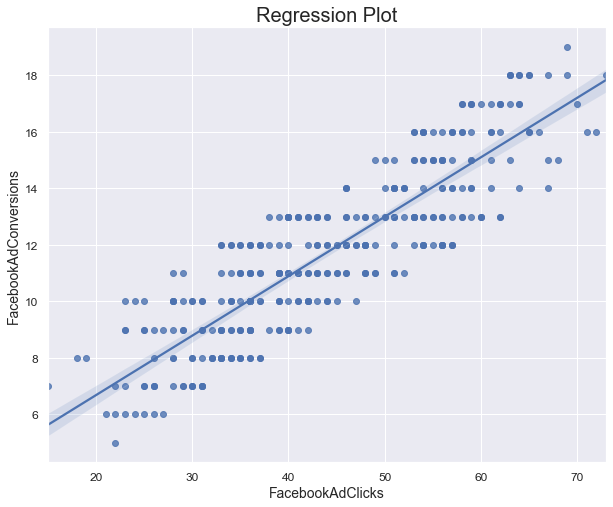

In [61]:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(x="FacebookAdClicks", y="FacebookAdConversions", data=df)
plt.title("Regression Plot", size=20)
plt.show()

Using your chart, state what your model shows to be the expected number of Facebook Ad Conversions for a day of 50 Facebook Clicks

**13**

#### Python code done by Dennis Lam